In [48]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [49]:
CATEGORIES = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

In [50]:
def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [51]:
model = tf.keras.models.load_model("animal10-CNN.model")

1/1 [==============================] - 0s 14ms/step


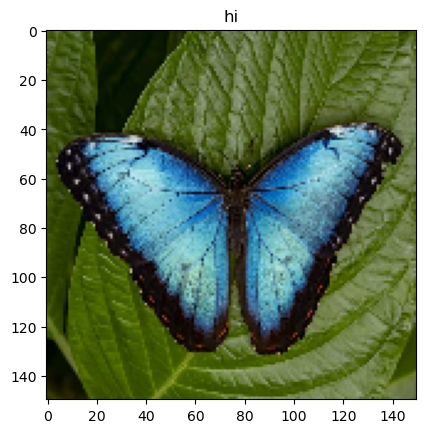

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : butterfly
Predict : butterfly 

1/1 [==============================] - 0s 14ms/step


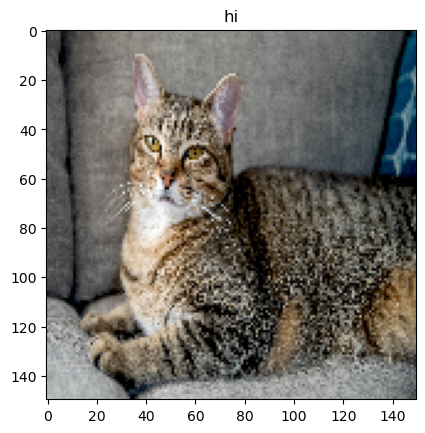

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : cat
Predict : butterfly 

1/1 [==============================] - 0s 15ms/step


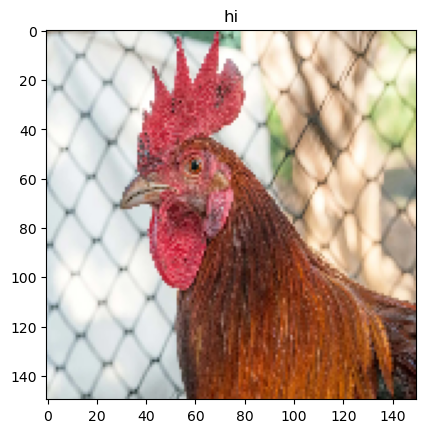

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : chicken
Predict : butterfly 

1/1 [==============================] - 0s 14ms/step


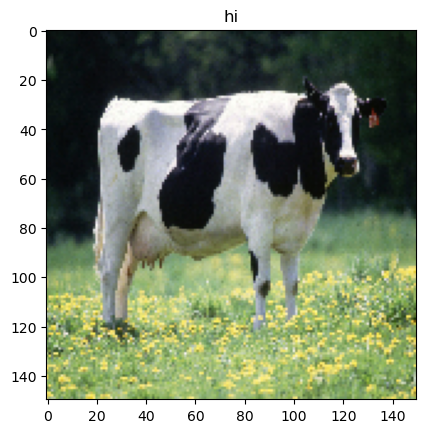

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Actual  : cow
Predict : cow 

1/1 [==============================] - 0s 14ms/step


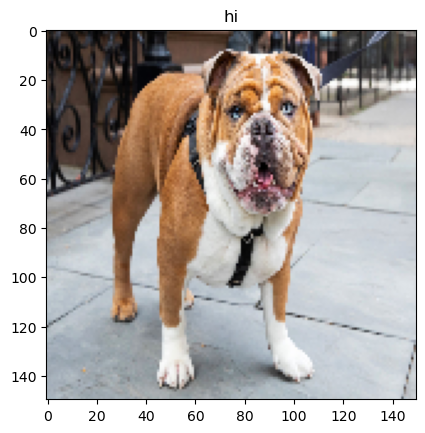

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : dog
Predict : cat 

1/1 [==============================] - 0s 14ms/step


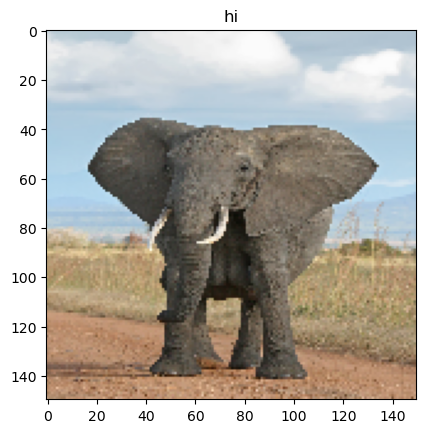

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.6076278e-11 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]
Actual  : elephant
Predict : sheep 

1/1 [==============================] - 0s 15ms/step


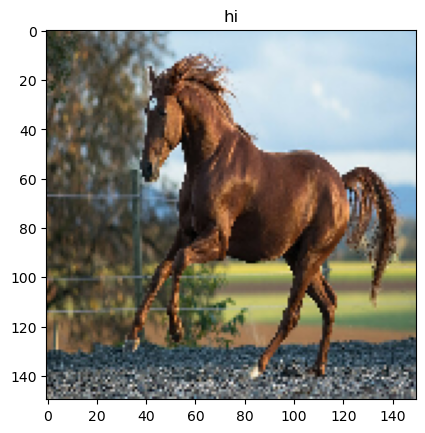

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Actual  : horse
Predict : horse 

1/1 [==============================] - 0s 15ms/step


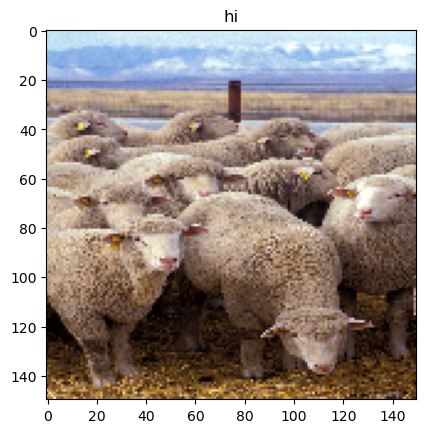

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : sheep
Predict : butterfly 

1/1 [==============================] - 0s 15ms/step


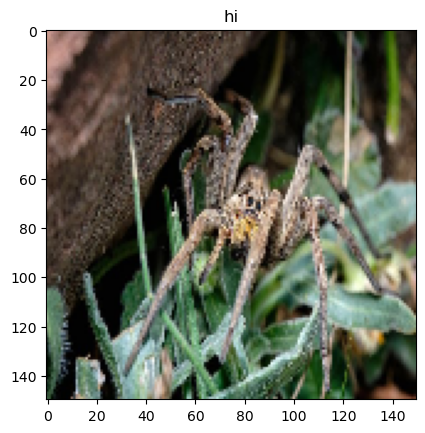

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : spider
Predict : butterfly 

1/1 [==============================] - 0s 14ms/step


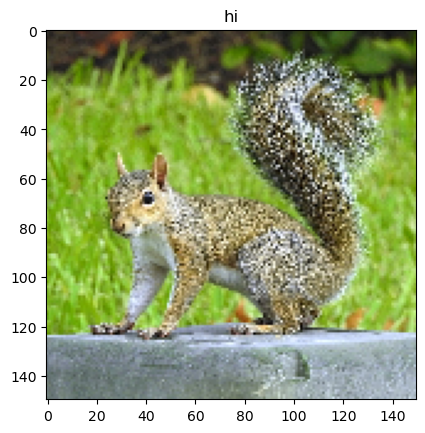

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Actual  : squirrel
Predict : butterfly 



In [62]:
image_dir = 'test_images'

for category in CATEGORIES:
    filepath = os.path.join(image_dir, f"{category}.jpg")
    prediction = model.predict([prepare(filepath)])
    
    resized_img = cv2.resize(cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB), (150, 150))
    
    plt.imshow(resized_img)
    plt.title(category)
    plt.show()
    
    print(prediction)
    print('Actual  :', category)
    print('Predict :', CATEGORIES[prediction[0].argmax()], '\n')
